In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
points = pd.DataFrame(columns=['Lat', 'Lon', 'StreetAddress', 'Source', 'SourceId'])
points

,Lat,Lon,StreetAddress,Source,SourceId


In [3]:
df_311 = pd.read_csv('data/detroit-311.csv')
df_311.head()

,ticket_id,city,issue_type,ticket_status,issue_description,rating,ticket_closed_date_time,acknowledged_at,ticket_created_date_time,ticket_last_updated_date_time,address,lat,lng,location,image
0,1516722,City of Detroit,Clogged Drain,Acknowledged,"Two drains one on each side of street, street ...",3,NaN,03/06/2015 10:03:38 PM,03/06/2015 09:57:52 PM,04/12/2015 01:01:10 AM,"13120-13130 Ilene Street Detroit, MI 48238, USA",42.383998,-83.161039,"(42.3839977668, -83.1610385642)",NaN
1,1525361,City of Detroit,Clogged Drain,Acknowledged,standing water on lumplin,2,NaN,03/11/2015 04:23:11 PM,03/11/2015 04:14:29 PM,04/07/2015 02:04:44 PM,"1485 E. Outer Drive Detroit, Michigan",42.440471,-83.080919,"(42.4404708, -83.080919)",NaN
2,1525218,City of Detroit,Clogged Drain,Closed,CITZEN CALLED TO REPORT CLOGGED DRAINS,2,08/15/2015 12:03:43 AM,03/11/2015 03:39:05 PM,03/11/2015 03:26:20 PM,08/15/2015 12:03:44 AM,"15460 Eastburn Detroit, Michigan",42.445244,-82.962038,"(42.445244, -82.962038)",NaN
3,1525214,City of Detroit,Clogged Drain,Acknowledged,Citizen called DWSD to report clogged drain,3,NaN,03/11/2015 03:35:02 PM,03/11/2015 03:22:42 PM,06/07/2015 10:07:48 PM,"17541 Mendota St Detroit, Michigan",42.421043,-83.166194,"(42.421043, -83.166194)",NaN
4,1525142,City of Detroit,Clogged Drain,Acknowledged,@ THE CORNER OF GRIGGS & MARGARETA,2,NaN,03/11/2015 03:04:59 PM,03/11/2015 02:53:23 PM,03/11/2015 03:04:59 PM,"Griggs Detroit, Michigan",42.402033,-83.162874,"(42.4020334, -83.1628741)",NaN


In [4]:
def normalize_street_address(address):
    address = address.str.upper()
    address = address.str.lstrip('0')
    address = address.str.replace(r'\s+', ' ')
    address = address.str.rstrip()
    address = address.str.replace(r' DETROIT\b.*', '')
    address = address.str.replace(r' #\d+$', '')
    address = address.str.replace(r'[^A-Z0-9&/ ]', '')
    address = address.str.replace(r' (ST|STREET|RD|ROAD|DR|DRIVE)$', '')
    address = address.str.replace(r' (AND|&&) | ?/ ?', ' & ')
    address = address.str.replace(r' (APT|ARTMENT|ROOM|FLAT)( ?\w?\d+)?$', '')
    return address

In [5]:
points_311 = pd.DataFrame.from_dict({
    'Lat': df_311.lat,
    'Lon': df_311.lng,
    'StreetAddress': normalize_street_address(df_311.address.map(lambda x: x.upper().split(' DETROIT,')[0])),
    'Source': '311',
    'SourceId': df_311.ticket_id,
})
points_311.head()

,Lat,Lon,Source,SourceId,StreetAddress
0,42.383998,-83.161039,311,1516722,1312013130 ILENE
1,42.440471,-83.080919,311,1525361,1485 E OUTER
2,42.445244,-82.962038,311,1525218,15460 EASTBURN
3,42.421043,-83.166194,311,1525214,17541 MENDOTA
4,42.402033,-83.162874,311,1525142,GRIGGS


In [6]:
df_violations = pd.read_csv('data/detroit-blight-violations.csv')
df_violations.head()

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (6,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,TicketID,TicketNumber,AgencyName,ViolName,ViolationStreetNumber,ViolationStreetName,MailingStreetNumber,MailingStreetName,MailingCity,MailingState,...,AdminFee,LateFee,StateFee,CleanUpCost,JudgmentAmt,PaymentStatus,Void,ViolationCategory,ViolationAddress,MailingAddress
0,26288,05000001DAH,Department of Public Works,"Group, LLC, Grand Holding",2566,GRAND BLVD,743,"Beaubien, Ste. 201",Detroit,MI,...,$20.00,$150.00,$10.00,$0.00,$1680.00,PAID IN FULL,0.0,0,"2566 GRAND BLVD\nDetroit, MI\n(42.363182370000...","743 Beaubien\nDetroit, MI 48226\n(42.333730630..."
1,19800,05000025DAH,Department of Public Works,"JACKSON, RAECHELLE",19014,ASHTON,20501,HEYDEN,DETROIT,MI,...,$20.00,$10.00,$10.00,$0.00,$140.00,NO PAYMENT APPLIED,0.0,0,"19014 ASHTON\nDetroit, MI\n(42.429390762000025...","20501 HEYDEN\nDETROIT, MI 48219\n(42.442177633..."
2,19804,05000026DAH,Department of Public Works,"TALTON, CAROL ANN",18735,STAHELIN,18735,STAHELI N,DETROIT,MI,...,$20.00,$10.00,$10.00,$0.00,$140.00,PAID IN FULL,0.0,0,"18735 STAHELIN\nDetroit, MI\n(42.4287074590000...","18735 STAHELI N\nDETROIT, MI 48219\n(42.428707..."
3,20208,05000027DAH,Department of Public Works,"BONNER, DARRYL E.",20125,MONICA,25335,PEEKSKILL,SOUTHFIELD,MI,...,$20.00,$10.00,$10.00,$0.00,$140.00,NO PAYMENT APPLIED,0.0,0,"20125 MONICA\nDetroit, MI\n(42.44169828400004,...","25335 PEEKSKILL\nSOUTHFIELD, MI 48043\n(42.475..."
4,20211,05000028DAH,Department of Public Works,"GREGORY, JAMES LEE",17397,PRAIRIE,17397,PRAIRIE,DETROIT,MI,...,$20.00,$10.00,$10.00,$0.00,$140.00,PAID IN FULL,0.0,0,"17397 PRAIRIE\nDetroit, MI\n(42.42031769500005...","17397 PRAIRIE\nDETROIT, MI 48221\n(42.42031769..."


In [7]:
address_lines = df_violations.ViolationAddress.map(lambda x: x.split('\n'))
latlon = address_lines.map(lambda x: x[-1][1:-1].split(', '))
points_violations = pd.DataFrame.from_dict({
    'Lat': latlon.map(lambda x: float(x[0])),
    'Lon': latlon.map(lambda x: float(x[1])),
    'StreetAddress': normalize_street_address(address_lines.map(lambda x: x[0])),
    'Source': 'violations',
    'SourceId': df_violations.TicketID,
})
points_violations.head()

,Lat,Lon,Source,SourceId,StreetAddress
0,42.363182,-83.091677,violations,26288,2566 GRAND BLVD
1,42.429391,-83.220394,violations,19800,19014 ASHTON
2,42.428707,-83.227548,violations,19804,18735 STAHELIN
3,42.441698,-83.145018,violations,20208,20125 MONICA
4,42.420318,-83.145328,violations,20211,17397 PRAIRIE


In [8]:
df_crime = pd.read_csv('data/detroit-crime.csv', dtype={'INCINO': 'str'})
df_crime.head()

,ROWNUM,CASEID,INCINO,CATEGORY,OFFENSEDESCRIPTION,STATEOFFENSEFILECLASS,INCIDENTDATE,HOUR,SCA,PRECINCT,COUNCIL,NEIGHBORHOOD,CENSUSTRACT,ADDRESS,LON,LAT,LOCATION
0,53256,1953933,1506030028.1,ASSAULT,ASSAULT AND BATTERY/SIMPLE ASSAULT,13001.0,06/03/2015 12:00:00 AM,2,1007.0,10.0,City Council District 5,PETOSKEY-OTSEGO,5334.0,09100 PETOSKEY,-83.1221,42.3678,"PETOSKEY\n09100\n(42.3676, -83.1219)"
1,17631,1917717,1503010158.1,LARCENY,LARCENY - PARTS AND ACCESSORIES FROM VEHICLE,23006.0,03/01/2015 12:00:00 AM,9,608.0,6.0,City Council District 7,GRANDALE,5452.0,00 PLYMOUTH AND MANSFIELD,-83.2035,42.3724,"00 PLYMOUTH AND MANSFIELD\n(42.3725, -83.2033)"
2,11207,1910955,1502080223.1,STOLEN VEHICLE,VEHICLE THEFT,24001.0,02/08/2015 12:00:00 AM,18,1105.0,11.0,City Council District 3,OUTER DRIVE VAN DYKE,5051.0,00 E 7 MILE VAN DYKE,-83.0241,42.4338,"00 E 7 MILE VAN DYKE\n(42.4339, -83.0241)"
3,116589,2018186,1511090188.1,WEAPONS OFFENSES,WEAPONS OFFENSE (OTHER),52003.0,11/09/2015 12:00:00 AM,12,210.0,2.0,City Council District 6,TIREMAN,NaN,06600 BARTON,-83.1381,42.3496,"BARTON\n06600\n(42.3494, -83.1379)"
4,85790,1986862,1508239803.1,LARCENY,LARCENY - PARTS AND ACCESSORIES FROM VEHICLE,23006.0,08/14/2015 12:00:00 AM,7,309.0,3.0,City Council District 6,WEST CANFIELD,5204.0,00900 W WILLIS,-83.0692,42.3481,"W WILLIS\n00900\n(42.3481, -83.0693)"


In [9]:
points_crime = pd.DataFrame.from_dict({
    'Lat': df_crime.LAT,
    'Lon': df_crime.LON,
    'StreetAddress': normalize_street_address(df_crime.ADDRESS),
    'Source': 'crime',
    'SourceId': df_crime.INCINO,
})
points_crime = points_crime[~points_crime.Lat.isnull() & ~points_crime.Lon.isnull()]
points_crime.head()

,Lat,Lon,Source,SourceId,StreetAddress
0,42.3678,-83.1221,crime,1506030028.1,9100 PETOSKEY
1,42.3724,-83.2035,crime,1503010158.1,PLYMOUTH & MANSFIELD
2,42.4338,-83.0241,crime,1502080223.1,E 7 MILE VAN DYKE
3,42.3496,-83.1381,crime,1511090188.1,6600 BARTON
4,42.3481,-83.0692,crime,1508239803.1,900 W WILLIS


In [10]:
df_demolition = pd.read_csv('data/detroit-demolition-permits.tsv', sep='\t')
df_demolition.head()

,PERMIT_NO,PERMIT_APPLIED,PERMIT_ISSUED,PERMIT_EXPIRES,SITE_ADDRESS,BETWEEN1,PARCEL_NO,LOT_NUMBER,SUBDIVISION,CASE_TYPE,...,CONTRACTOR_ADDRESS1,CONTRACTOR_ADDRESS2,CONTRACTOR_CITY,CONTRACTOR_STATE,CONTRACTOR_ZIP,CONDITION_FOR_APPROVAL,site_location,owner_location,contractor_location,geom
0,BLD2015-03955,8/28/15,8/28/15,NaN,4331 BARHAM,BETWEEN VOIGHT AND WAVENEY,21 65525-6,S15,NaN,BLD,...,13500 FOLEY,NaN,DETROIT,NaN,48227.0,NaN,"4331 BARHAM\nDetroit, MI\n(42.394106, -82.9474)","65 CADILLAC\nDETROIT, MI\n(42.331741326000042,...","13500 FOLEY\nDETROIT, MI\n(42.379332, -83.177501)",NaN
1,BLD2015-04083,8/28/15,8/28/15,NaN,9707 BESSEMORE,BETWEEN VINTON AND GRATIOT,19 2312.,40,NaN,BLD,...,13500 FOLEY,NaN,DETROIT,NaN,48227.0,NaN,"9707 BESSEMORE\nDetroit, MI\n(42.395122, -83.0...","65 CADILLAC\nDETROIT, MI\n(42.331741326000042,...","13500 FOLEY\nDETROIT, MI\n(42.379332, -83.177501)",NaN
2,BLD2015-03976,8/28/15,8/28/15,NaN,5315 BERKSHIRE,BETWEEN SOUTHAMPTON AND FRANKFORT,21 69321.,445,NaN,BLD,...,13500 FOLEY,NaN,DETROIT,NaN,48227.0,NaN,"5315 BERKSHIRE\nDetroit, MI\n(42.40322, -82.94...","65 CADILLAC\nDETROIT, MI\n(42.331741326000042,...","13500 FOLEY\nDETROIT, MI\n(42.379332, -83.177501)",NaN
3,BLD2015-03781,8/28/15,8/28/15,NaN,16670 BRINGARD DR,BETWEEN CUSHING AND SHAKESPEARE,21 25930.,97,NaN,BLD,...,13500 FOLEY,NaN,DETROIT,NaN,48227.0,NaN,"16670 BRINGARD DR\nDetroit, MI\n(42.44664, -82...","65 CADILLAC\nDETROIT, MI\n(42.331741326000042,...","13500 FOLEY\nDETROIT, MI\n(42.379332, -83.177501)",NaN
4,BLD2015-03677,8/28/15,8/28/15,NaN,1454 BEATRICE,BETWEEN TORONTO AND GILROY,20 12871.012,21,NaN,BLD,...,13500 FOLEY,NaN,DETROIT,NaN,48227.0,NaN,"1454 BEATRICE\nDetroit, MI\n(42.276956, -83.14...","65 CADILLAC\nDETROIT, MI\n(42.331741326000042,...","13500 FOLEY\nDETROIT, MI\n(42.379332, -83.177501)",NaN


In [11]:
# XXX: Ignore addresses without coordinates for now.
df = df_demolition[~df_demolition.site_location.str.endswith('\n', na=True)]

address_lines = df.site_location.map(lambda x: x.split('\n'))
latlon = address_lines.map(lambda x: x[-1][1:-1].split(', '))
points_demolition = pd.DataFrame.from_dict({
    'Lat': latlon.map(lambda x: float(x[0])),
    'Lon': latlon.map(lambda x: float(x[1])),
    'StreetAddress': normalize_street_address(df.SITE_ADDRESS),
    'Source': 'demolition',
    'SourceId': df.PERMIT_NO,
})
points_demolition.head()

,Lat,Lon,Source,SourceId,StreetAddress
0,42.394106,-82.947400,demolition,BLD2015-03955,4331 BARHAM
1,42.395122,-83.005077,demolition,BLD2015-04083,9707 BESSEMORE
2,42.403220,-82.946476,demolition,BLD2015-03976,5315 BERKSHIRE
3,42.446640,-82.947207,demolition,BLD2015-03781,16670 BRINGARD
4,42.276956,-83.147536,demolition,BLD2015-03677,1454 BEATRICE


In [12]:
points = pd.concat([
    points_311,
    points_violations,
    points_crime,
    points_demolition,
])

In [13]:
points.sample(n=20)

,Lat,Lon,Source,SourceId,StreetAddress
103144,42.355124,-83.097797,violations,137935,2727 MCGRAW
6850,42.425900,-83.061500,crime,1509050308.1,E NEVADA DEAN
6944,42.401100,-83.263700,crime,1503060120.1,15300 BRAMELL
14214,42.417241,-83.053847,violations,32933,13551 HEALY
106476,42.416100,-83.173700,crime,1509170339.1,13000 W MCNICHOLS
190581,42.331681,-83.047996,violations,223618,2482 BUENA VISTA
193659,42.377251,-83.169464,violations,228391,12114 APPOLINE
223815,42.309568,-83.115074,violations,251794,1538 BEARD
70374,42.436251,-82.976883,violations,95142,14366 GRATIOT
69294,42.440400,-83.053800,crime,1511130364.1,E OUTER DR & FENELON


In [14]:
points_311.sample(10)

,Lat,Lon,Source,SourceId,StreetAddress
10473,42.418526,-83.228539,311,1669110,8547 OUTER DRIVE WEST
10505,42.410270,-82.981407,311,1670001,PARK
4482,42.429542,-83.079418,311,1417710,18587 FLEMING
9087,42.386256,-83.163945,311,1628426,13508 & 13516 MENDOTA
2432,42.408393,-83.236690,311,1757696,19800 GRAND RIVER AVE
12267,42.358057,-82.995513,311,1733587,1710 SEMINOLE
8533,42.336084,-83.043881,311,1612996,430 CLINTON
1353,42.290682,-83.123681,311,1707693,8982 THADDEUS
5921,42.444067,-83.070499,311,1536888,20196 GALLAGHER
14744,42.333413,-83.152429,311,1838702,5765 CABOT


In [15]:
points_demolition.sample(10)

,Lat,Lon,Source,SourceId,StreetAddress
2069,42.371357,-83.205947,demolition,BLD2014-02502,11387 METTETAL
5669,42.377290,-83.012327,demolition,BLD2012-03030,5069 PARKER
4634,42.388771,-82.990508,demolition,BLD2012-05819,5255 LEMAY
3562,42.399111,-83.264253,demolition,BLD2013-01308,15108 BRAMELL
3349,42.289766,-83.146690,demolition,BLD2013-02601,387 OAKWOOD
182,42.438373,-82.951286,demolition,BLD2015-05003,16308 CORAM
4983,42.439170,-82.980468,demolition,BLD2012-04939,19529 HOYT
4333,42.331681,-83.047996,demolition,BLD2012-04840,7784 88 EVERGREEN
3150,42.389434,-83.063415,demolition,BLD2013-03737,1840 HOLBROOK PLANT 1
388,42.389492,-83.009242,demolition,BLD2015-04957,18090 JAMES COUZENS


In [16]:
points[['Lat', 'Lon']].to_csv('latlon.csv', index=False)

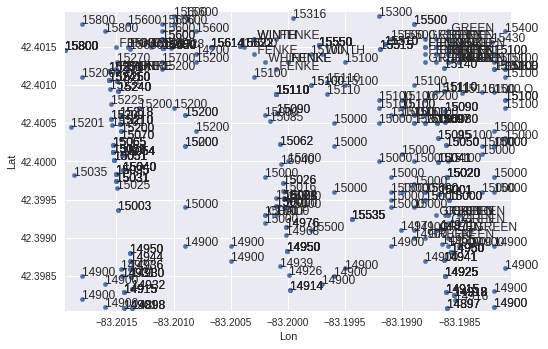

In [17]:
import mpld3

lon = -83.2
lat = 42.4
radius = 1 / 32 / 2 / 2 / 2 / 2

data = points
data = data[(lon - radius < data.Lon) & (data.Lon < lon + radius) & (lat - radius < data.Lat) & (data.Lat < lat + radius)]

fig, ax = plt.subplots()
data.plot.scatter(x='Lon', y='Lat', ax=ax)
mpld3.plugins.connect(fig, mpld3.plugins.PointLabelTooltip(ax.collections[0], data.StreetAddress.tolist()))
for _, row in data.iterrows():
    ax.annotate(row.StreetAddress[:6], (row.Lon, row.Lat))
ax.axis([lon - radius, lon + radius, lat - radius, lat + radius])
ax.ticklabel_format(useOffset=False)

In [18]:
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.plotting import figure, show
from bokeh.models.tiles import WMTSTileSource
import pyproj

output_notebook()

Loading BokehJS ...

In [19]:
lonlat_proj = pyproj.Proj(init='epsg:4326')
xy_proj = pyproj.Proj(init='epsg:3857')

def add_xy(df):
    df = df.copy()
    if df.empty:
        return df
    xy = df.apply(lambda row: pyproj.transform(lonlat_proj, xy_proj, row.Lon, row.Lat), axis=1)
    df['X'] = xy.map(lambda row: row[0])
    df['Y'] = xy.map(lambda row: row[1])
    return df

world_topo_map = WMTSTileSource(
    url='https://server.arcgisonline.com/ArcGIS/rest/services/World_Topo_Map/MapServer/tile/{z}/{y}/{x}',
    attribution='Tiles &copy; <a href="https://services.arcgisonline.com/ArcGIS/rest/services/World_Topo_Map/MapServer">ArcGIS</a>'
)

In [20]:
from bokeh.models import CategoricalColorMapper
from bokeh.plotting.helpers import DEFAULT_PALETTE
import itertools

def repeat_palette(palette, length):
    return list(itertools.islice(itertools.cycle(palette), length))

In [21]:
lon = -83.2
lat = 42.4
radius = 1 / 512 * 4

data = points.copy()
data = data[(lon - radius < data.Lon) & (data.Lon < lon + radius) &
            (lat - radius < data.Lat) & (data.Lat < lat + radius)]
print(len(data), 'incidents')

4455 incidents


In [22]:
p = figure()
p.axis.visible = False

p.add_tools(HoverTool(tooltips=[
    ('Address', '@StreetAddress'),
    ('Location', '(@Lat, @Lon)'),
    ('Incident', '@Source @SourceId'),
]))

p.circle(
    source=ColumnDataSource(data=add_xy(data)), x='X', y='Y',
    size=9, fill_color='blue', fill_alpha=0.5, line_color=None
)

p.add_tile(world_topo_map)

show(p)

In [23]:
from sklearn.cluster import DBSCAN

model = DBSCAN(eps=0.00001, min_samples=1).fit(data[['Lat', 'Lon']])
data['Label'] = model.labels_
len(data), len(set(data.Label))

(4455, 2267)

In [24]:
def plot_labeled(data):
    p = figure()
    p.axis.visible = False

    p.add_tools(HoverTool(tooltips=[
        ('Label', '@Label'),
        ('Address', '@StreetAddress'),
        ('Location', '(@Lat, @Lon)'),
        ('Incident', '@Source @SourceId'),
    ]))

    labels = list(data.Label.unique())

    color_mapper = CategoricalColorMapper(
        factors=labels,
        palette=repeat_palette(DEFAULT_PALETTE, len(labels))
    )

    p.circle(
        source=ColumnDataSource(data=add_xy(data)), x='X', y='Y',
        size=6,
        alpha=0.4,
        color=dict(field='Label', transform=color_mapper)
    )

    p.add_tile(world_topo_map)

    print(len(data), 'incidents')
    print(len(labels), 'points')
    show(p)
    
plot_labeled(data[data.StreetAddress == '15700 ROBSON'])

12 incidents
6 points


In [25]:
data.StreetAddress.value_counts()

15000 GREENFIELD                         32
15100 GREENFIELD                         31
14800 GREENFIELD                         30
15300 FENKELL                            30
 GRAND RIVER & GREENFIELD                26
15300 RUTHERFORD                         21
15400 GREENFIELD                         19
15119 PREST                              18
15650 FENKELL                            18
14500 GREENFIELD                         17
15339 GREENFIELD                         17
14528 WHITCOMB                           17
14600 FORRER                             16
15700 COYLE                              16
15000 PREST                              16
15110 WINTHROP                           16
15101 FENKELL                            16
15800 GRAND RIVER                        15
 FENKELL & GREENFIELD                    14
15300 GREENFIELD                         14
15700 GREENFIELD                         14
16151 GRAND RIVER                        14
 GREENFIELD & EATON             

In [26]:
for address, group in data.groupby('StreetAddress'):
    if len(group) == 1 or len(group.Label.unique()) == 1 or ' & ' in address:
        continue
    print()
    print(group)


            Lat      Lon Source      SourceId    StreetAddress  Label
9385    42.4016 -83.1948  crime  1506030336.1   FENKELL SUSSEX   1181
18181   42.4017 -83.1949  crime  1506030365.1   FENKELL SUSSEX   1131
29139   42.4014 -83.1950  crime  1506030372.1   FENKELL SUSSEX   1394
65630   42.4015 -83.1952  crime  1506030333.1   FENKELL SUSSEX   1767
102924  42.4017 -83.1948  crime  1506030337.1   FENKELL SUSSEX   1183

            Lat      Lon Source      SourceId            StreetAddress  Label
53262   42.3927 -83.1984  crime  1506250369.1   GRAND RIVER GREENFIELD   1650
103947  42.3926 -83.1983  crime  1507180297.1   GRAND RIVER GREENFIELD   1094

            Lat      Lon Source      SourceId StreetAddress  Label
1344    42.3923 -83.1935  crime  1504220353.1   14300 COYLE   1092
8928    42.3925 -83.1935  crime  1506170240.1   14300 COYLE   1176
10263   42.3922 -83.1937  crime  1503190304.1   14300 COYLE   1189
15211   42.3927 -83.1931  crime  1505190406.1   14300 COYLE   1249
49746   

In [27]:
df_crime[df_crime.ADDRESS.str.contains('15000 GREENFIELD')]

,ROWNUM,CASEID,INCINO,CATEGORY,OFFENSEDESCRIPTION,STATEOFFENSEFILECLASS,INCIDENTDATE,HOUR,SCA,PRECINCT,COUNCIL,NEIGHBORHOOD,CENSUSTRACT,ADDRESS,LON,LAT,LOCATION
266,87334,1988439,1508270077.1,DAMAGE TO PROPERTY,DAMAGE TO PROPERTY - PRIVATE PROPERTY,29000.0,08/26/2015 12:00:00 AM,14,814.0,8.0,City Council District 1,GRANDMONT-ROSEDALE,5423.0,15000 GREENFIELD APT 24,-83.1991,42.3994,"GREENFIELD APT 24\n15000\n(42.3995, -83.1992)"
7935,23225,1923443,1503170362.1,ASSAULT,INTIMIDATION,13003.0,03/16/2015 12:00:00 AM,20,202.0,2.0,City Council District 1,COOLEY,5377.0,15000 GREENFIELD,-83.1980,42.4002,"GREENFIELD\n15000\n(42.4, -83.1981)"
8332,111236,2012767,1510260348.1,ASSAULT,ASSAULT AND BATTERY/SIMPLE ASSAULT,13001.0,10/26/2015 12:00:00 AM,18,814.0,8.0,City Council District 1,GRANDMONT-ROSEDALE,NaN,15000 GREENFIELD,-83.1989,42.3994,"GREENFIELD\n15000\n(42.3995, -83.1989)"
20631,62992,1963794,1506270250.1,TRAFFIC VIOLATIONS-MOTORCYCLE VIOLATIONS,MISCELLANEOUS - NATURAL DEATH,99002.0,06/27/2015 12:00:00 AM,15,202.0,2.0,City Council District 1,COOLEY,5377.0,15000 GREENFIELD APT. 9,-83.1983,42.4001,"GREENFIELD APT. 9\n15000\n(42.4002, -83.1982)"
21003,51381,1952081,1505290197.1,LARCENY,LARCENY (OTHER),23007.0,05/29/2015 12:00:00 AM,9,202.0,2.0,City Council District 1,COOLEY,5377.0,15000 GREENFIELD APT 6,-83.1988,42.3995,"GREENFIELD APT 6\n15000\n(42.3997, -83.1987)"
22360,72632,1973597,1507220135.1,TRAFFIC VIOLATIONS-MOTORCYCLE VIOLATIONS,MISCELLANEOUS - GENERAL ASSISTANCE,99008.0,07/22/2015 12:00:00 AM,10,202.0,2.0,City Council District 1,COOLEY,5377.0,15000 GREENFIELD,-83.1982,42.3998,"GREENFIELD\n15000\n(42.3997, -83.1983)"
22976,53942,1954626,1506040302.1,TRAFFIC VIOLATIONS-MOTORCYCLE VIOLATIONS,MISCELLANEOUS - MISSING PERSONS,99003.0,06/01/2015 12:00:00 AM,13,202.0,2.0,City Council District 1,COOLEY,5377.0,15000 GREENFIELD APT#5,-83.1982,42.4004,"GREENFIELD APT#5\n15000\n(42.4004, -83.1983)"
26481,69629,1970540,1507150003.1,ASSAULT,ASSAULT AND BATTERY/SIMPLE ASSAULT,13001.0,07/14/2015 12:00:00 AM,23,814.0,8.0,City Council District 1,GRANDMONT-ROSEDALE,5423.0,15000 GREENFIELD,-83.1992,42.4005,"GREENFIELD\n15000\n(42.4006, -83.1991)"
28812,87347,1988454,1508270091.1,DAMAGE TO PROPERTY,DAMAGE TO PROPERTY - PRIVATE PROPERTY,29000.0,08/25/2015 12:00:00 AM,21,814.0,8.0,City Council District 1,GRANDMONT-ROSEDALE,5423.0,15000 GREENFIELD,-83.1990,42.3996,"GREENFIELD\n15000\n(42.3997, -83.1989)"
40118,103421,2004779,1510070018.1,TRAFFIC VIOLATIONS-MOTORCYCLE VIOLATIONS,MISCELLANEOUS - IMPOUNDED VEHICLE,99009.0,10/07/2015 12:00:00 AM,1,202.0,2.0,City Council District 1,COOLEY,5377.0,15000 GREENFIELD / CHALFONTE,-83.1980,42.3994,"GREENFIELD / CHALFONTE\n15000\n(42.3996, -83.1..."


In [28]:
points_crime[points_crime.StreetAddress.str.contains('15000 GREENFIELD')]

,Lat,Lon,Source,SourceId,StreetAddress
266,42.3994,-83.1991,crime,1508270077.1,15000 GREENFIELD
7935,42.4002,-83.1980,crime,1503170362.1,15000 GREENFIELD
8332,42.3994,-83.1989,crime,1510260348.1,15000 GREENFIELD
20631,42.4001,-83.1983,crime,1506270250.1,15000 GREENFIELD
21003,42.3995,-83.1988,crime,1505290197.1,15000 GREENFIELD
22360,42.3998,-83.1982,crime,1507220135.1,15000 GREENFIELD
22976,42.4004,-83.1982,crime,1506040302.1,15000 GREENFIELD
26481,42.4005,-83.1992,crime,1507150003.1,15000 GREENFIELD
28812,42.3996,-83.1990,crime,1508270091.1,15000 GREENFIELD
40118,42.3994,-83.1980,crime,1510070018.1,15000 GREENFIELD & CHALFONTE
